In [26]:
import numpy as np
import pandas as pd
import random as rand
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
import ndjson
import ipyvolume as ipv
from matplotlib import colors
import matplotlib
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
import umap as umap
import seaborn as sns
import random
import json

In [66]:
DRAWING_POSITION = 0
PATH = './data/2_categories/'
VALIDATION_PATH = './data/to_be_validated/' 
PERCENT = 0.1

# Importing the files

In [33]:
data = []
filelist = os.listdir(PATH)
print(filelist)

['full-raw-angel.ndjson', 'full-raw-ambulance.ndjson']


In [34]:
for file in filelist:
    if(file.split('.')[1] == "ndjson"):
        with open(PATH + file) as f:
            data = data + ndjson.load(f)
            print(len(data))
        f.close()

10038
20040


In [35]:
rand.shuffle(data)

In [22]:
print(data[0]['recognized'])

False


# Printing some drawings

In [36]:
# Just for demostration purposes, let's see some images.
nrows, ncols = 2, 4
plt.figure(figsize=(15,5));
plt.gray()

for j in range(ncols * nrows):
    drawing = data[DRAWING_POSITION + j]["drawing"]
    category = data[DRAWING_POSITION + j]["word"]
    recognized = data[DRAWING_POSITION + j]["recognized"]
    
    ax = plt.subplot(nrows, ncols, j + 1)
    
    for i in range(len(drawing)):
        stroke = drawing[i]
        ax.plot(stroke[0], stroke[1], color='k')
    
    plt.subplots_adjust(hspace = .7, wspace = .7)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title("Category: " + category + "\nRecognized: " + str(recognized))
    #plt.gca().invert_xaxis()
plt.savefig('./report_images/1-Printing_some_images.png', format='png', dpi=100)
plt.close()

# Preprocessing the data into the JSON file

In [51]:
key_ids = np.array([])
categories = np.array([])
numeric_categories = np.array([])
recognized = np.array([])
timestamps = np.array([])
countrycodes = np.array([])
drawings = [[] for _ in range(17698)]
outputFile = open("./data/allPreprocessed.json", mode='a')

boolList = ["True"]
drawing_position=0

for i in range(len(data)):
    print(i)
    print(data[i]["recognized"])
    if(data[i]["recognized"]):
        print("entra")
        key_ids = np.append(key_ids, data[i]["key_id"])
        categories = np.append(categories, data[i]["word"])
    
        if (data[i]["word"] == 'ambulance'): numeric_value = int(0)
        elif (data[i]["word"] == 'angel'): numeric_value = int(1)
    
        numeric_categories = np.append(numeric_categories, numeric_value)
        
        recognized = np.append(recognized, data[i]["recognized"])
        timestamps = np.append(timestamps, data[i]["timestamp"])
        countrycodes = np.append(countrycodes, data[i]["countrycode"])

        #Convert drawing vector's into matrix
        drawing = data[i]["drawing"]
        key_id = data[i]["key_id"]

        for j in range(len(drawing)):
            stroke = drawing[j]
            plt.plot(stroke[0], stroke[1], color='k')

        plt.gca().invert_yaxis()
        plt.axis('off')
        plt.savefig('./plots/' + str(key_id) + '_' + str(data[i]["word"]) + '_' + str(data[i]["recognized"]) + '.png', format='png', dpi=25)
        plt.close()
        img = Image.open('./plots/' + str(key_id) + '_' + str(data[i]["word"]) + '_' + str(data[i]["recognized"]) + '.png').convert('L')
        img.save('./plots/' + str(key_id) + '_' + str(data[i]["word"]) + '_' + str(data[i]["recognized"]) + '.bmp')
        os.remove('./plots/' + str(key_id) + '_' + str(data[i]["word"]) + '_' + str(data[i]["recognized"]) + '.png')

        bitmap = np.array(img)
        img_array = np.array([])


        for j in range(len(bitmap)):
            for k in range(len(bitmap[j])):
                img_array = np.append(img_array, bitmap[j][k])

        drawings[drawing_position] = img_array
        drawing_position = drawing_position + 1

numeric_categories = numeric_categories.astype(int)

16
True
entra
18817
True
entra
18818
True
entra
18819
True
entra
18820
True
entra
18821
True
entra
18822
True
entra
18823
True
entra
18824
True
entra
18825
True
entra
18826
True
entra
18827
True
entra
18828
False
18829
True
entra
18830
True
entra
18831
True
entra
18832
True
entra
18833
True
entra
18834
True
entra
18835
True
entra
18836
True
entra
18837
True
entra
18838
False
18839
True
entra
18840
True
entra
18841
True
entra
18842
True
entra
18843
False
18844
True
entra
18845
True
entra
18846
True
entra
18847
True
entra
18848
False
18849
True
entra
18850
False
18851
True
entra
18852
True
entra
18853
True
entra
18854
True
entra
18855
True
entra
18856
True
entra
18857
True
entra
18858
True
entra
18859
True
entra
18860
True
entra
18861
True
entra
18862
True
entra
18863
True
entra
18864
True
entra
18865
True
entra
18866
True
entra
18867
True
entra
18868
True
entra
18869
True
entra
18870
True
entra
18871
True
entra
18872
True
entra
18873
True
entra
18874
False
18875
False
18876
True
entra
1

In [49]:
print(drawings[1])

[]


# Reading JSON

# Profiling

## Countrycodes Apearences

130
118


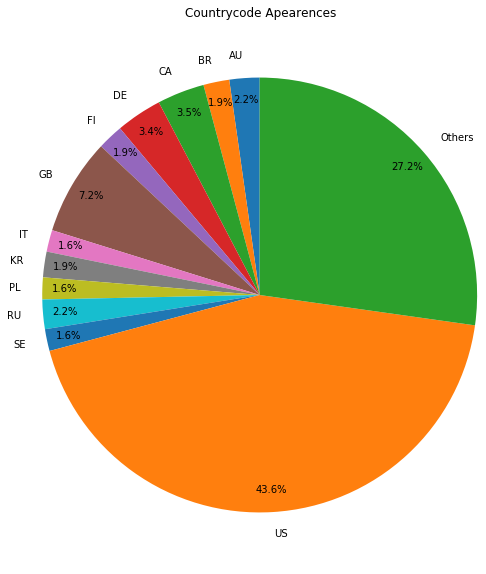

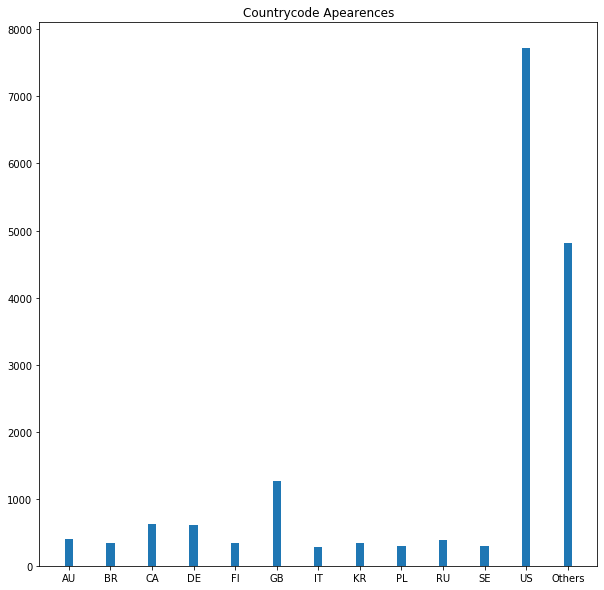

In [52]:
# countrycodes_values = list(set(countrycodes))
# countrycodes_values.sort()
# countrycodes_apearences = []

# for i in range (len(countrycodes_values)):
#     list_countrycodes = list(countrycodes)
#     count = list_countrycodes.count(countrycodes_values[i])
#     countrycodes_apearences.append(count)

# plt.subplots(figsize=(30,15))
# plt.bar(countrycodes_values, countrycodes_apearences , width=0.2)
# plt.title('Countrycode Apearences')
# plt.autoscale(axis= 'x', tight=True)
# plt.savefig('./report_images/0-Countrycodes_Apearences.png', bbox_inches='tight')
# plt.show()

countrycodes_values = list(set(countrycodes))
countrycodes_values.sort()
print(len(countrycodes_values))
countrycodes_labels = []
countrycodes_apearences = []
list_countrycodes = list(countrycodes)
percentages = []
total = len(countrycodes)
others_percentage = 0
count1=0
count2=0
for i in countrycodes_values:
    count = list_countrycodes.count(i)
    percentage = (count/total)*100
    if (percentage >= 1.5):
        
        countrycodes_apearences.append(count)
        percentages.append(percentage)
        countrycodes_labels.append(i)
    else:
        count1 = count1 + 1
        count2 = count2 + count
        others_percentage = others_percentage + percentage

countrycodes_labels.append('Others')
countrycodes_apearences.append(count2)
percentages.append(others_percentage)
print(count1)

    

plt.subplots(figsize=(10,10))
plt.pie(percentages, None, countrycodes_labels, autopct='%1.1f%%', shadow=False, startangle=90, pctdistance=0.9)
plt.title('Countrycode Apearences')
plt.autoscale(axis= 'x', tight=True)
plt.savefig('./report_images/0-Countrycodes_Apearences_Pie.png', bbox_inches='tight')
plt.show()
plt.close()

plt.subplots(figsize=(10,10))
plt.bar(countrycodes_labels, countrycodes_apearences , width=0.2)
plt.title('Countrycode Apearences')
plt.autoscale(axis= 'x', tight=False)
plt.savefig('./report_images/0-Countrycodes_Apearences_Bar.png')
plt.show()
plt.close()


## Category Apearences

{'angel', 'ambulance'}


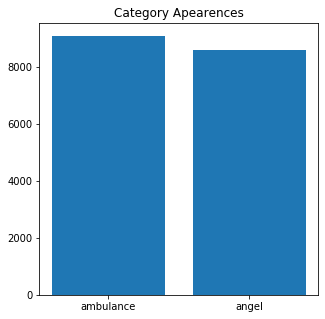

In [53]:
categories_values = list(set(categories))
print(set(categories))
categories_values.sort()
categories_apearences = []
mean = len(categories)/len(categories_values)

for i in range (len(categories_values)):
    list_categories = list(categories)
    count = list_categories.count(categories_values[i])
    categories_apearences.append(count)

fig, ax = plt.subplots(figsize=(5,5))
plt.bar(categories_values, categories_apearences)
plt.title('Category Apearences')
plt.autoscale(axis= 'x')
plt.savefig('./report_images/0-Category_Apearences.png')
plt.show()


## Recognition Rate

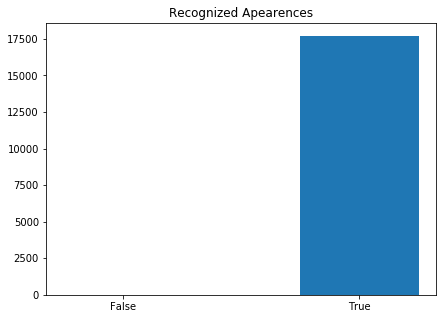

In [54]:
recognize_values = [False, True]
recognize_apearences = []

for i in range (len(recognize_values)):
    list_recognized = list(recognized)
    count = list_recognized.count(recognize_values[i])
    recognize_apearences.append(count)

plt.subplots(figsize=(7,5))
plt.bar(["False", "True"], recognize_apearences , width=0.5)
plt.title('Recognized Apearences')
plt.savefig('./report_images/0-Recognized_Apearences.png', bbox_inches='tight')
plt.show()


In [63]:
print(numeric_categories[0])

0


# Visualization by dimensionality reduction

## PCA 2D

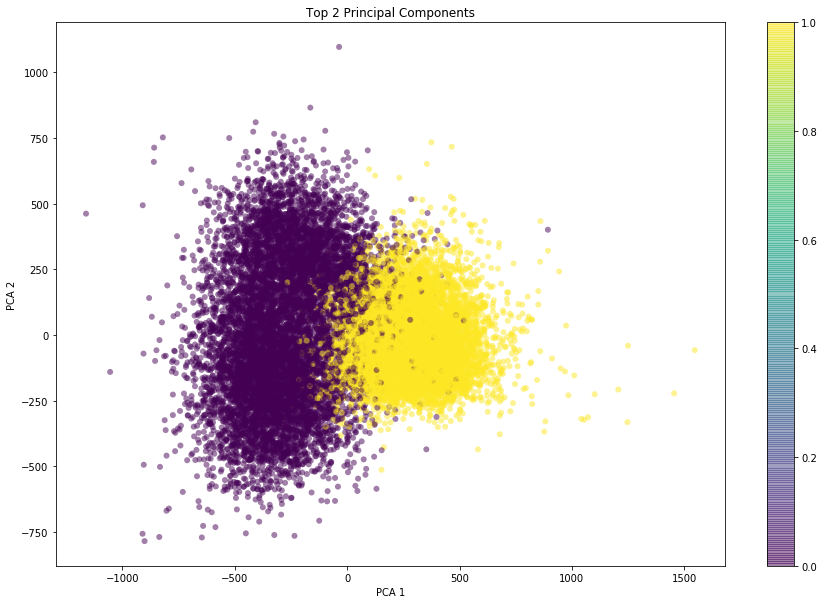

In [56]:
# Select only the first 2 principal components
pca = PCA(2)  # project from 64 to 2 dimensions
#Compute the first 2 PCA
projected = pca.fit_transform(drawings)

# Plot a scatter plot of the first 2 principal components
plt.figure(figsize=(15, 10))
plt.scatter(projected[:, 0], projected[:, 1], c=numeric_categories, edgecolor='none', alpha=0.5, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.title("Top 2 Principal Components")
plt.savefig('./report_images/2-PCA2_outliers.png', bbox_inches='tight')

## PCA 3D

<Figure size 1080x720 with 0 Axes>

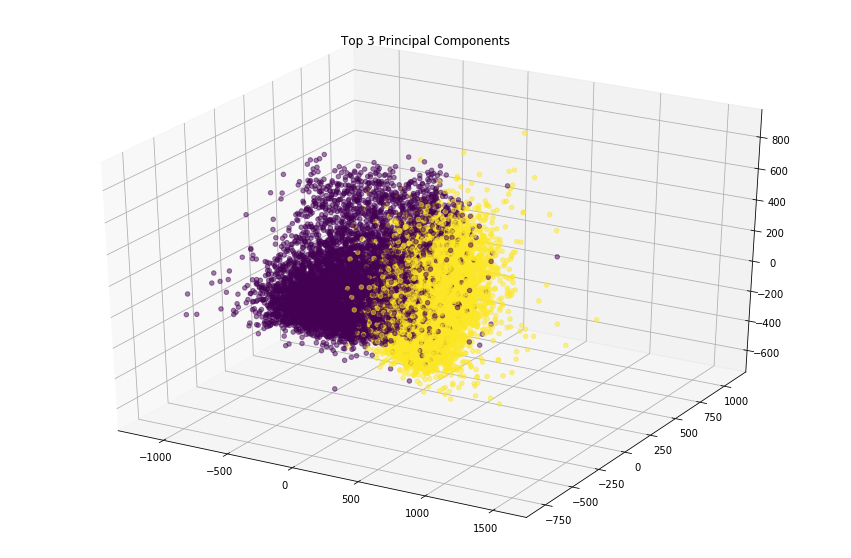

In [57]:
pca = PCA(3)  # project from 64 to 2 dimensions
#Compute the first 2 PCA
projected = pca.fit_transform(drawings)

# Plot a scatter plot of the first 2 principal components
plt.figure(figsize=(15, 10))

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(projected[:, 0], projected[:, 1],projected[:, 2], c=numeric_categories,  alpha=0.5,cmap='viridis')
plt.title("Top 3 Principal Components")
plt.savefig('./report_images/2-PCA3_outliers.png', bbox_inches='tight')
#plt.savefig('fig1.png', bbox_inches='tight')

# Preparing to classify

## Splitting data into training and testing

In [58]:
from sklearn.model_selection import train_test_split

# Training and testing split,
# 75% for training and 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(drawings), categories, test_size=0.25, random_state=42)

# take 10% of the training data and use that for validation
# (trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels, test_size=0.1, random_state=84)

# Checking sizes of each data split
print("Training data points: {}".format(len(trainLabels)))
# print("Validation data points: {}".format(len(valLabels)))
print("Testing data points: {}".format(len(testLabels)))

Training data points: 13273
Testing data points: 4425


## Importing data for validation

In [68]:
validationData = []
filelist = os.listdir(VALIDATION_PATH)
for file in filelist:
    if(file.split('.')[1] == "ndjson"):
        with open(VALIDATION_PATH + file) as f:
            validationData = validationData + ndjson.load(f)

rand.shuffle(validationData)

In [69]:
# validation_key_ids = np.array([])
validation_categories = np.array([])
validation_numeric_categories = np.array([])
validation_drawings = [[] for _ in range(len(validationData))]

for i in range(len(validationData)):
    
#     validation_key_ids = np.append(validation_key_ids, validationData[i]["key_id"])
    validation_categories = np.append(validation_categories, validationData[i]["word"])
    
    if (validationData[i]["word"] == 'ambulance'): validation_numeric_categories = np.append(validation_numeric_categories, int(0))
    elif (validationData[i]["word"] == 'angel'): validation_numeric_categories = np.append(validation_numeric_categories, int(1))
        
    validation_drawing = validationData[i]["drawing"]
    validation_key_id = validationData[i]["key_id"]
    
    for j in range(len(validation_drawing)):
        stroke = validation_drawing[j]
        plt.plot(stroke[0], stroke[1], color='k')

    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.savefig('./plots/' + str(validation_key_id) + '.png', format='png', dpi=25)
    plt.close()
    img = Image.open('./plots/' + str(validation_key_id) + '.png').convert('L')
    img.save('./plots/' + str(validation_key_id) + '.bmp')
    os.remove('./plots/' + str(validation_key_id) + '.png')
    
    bitmap = np.array(img)
    img_array = np.array([])


    for j in range(len(bitmap)):
        for k in range(len(bitmap[j])):
            img_array = np.append(img_array, bitmap[j][k])

    validation_drawings[i] = img_array

    
validation_numeric_categories = validation_numeric_categories.astype(int)

# KNN Clustering

## Finding the better "k"

In [64]:
from sklearn.neighbors import KNeighborsClassifier

# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
kVals = range(1, 30, 2)
accuracies = []

# loop over kVals
for k in range(1, 30, 2):
    # train the classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)

    # evaluate the model and print the accuracies list
    score = model.score(testData, testLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)
    
# largest accuracy
# np.argmax returns the indices of the maximum values along an axis
i = np.argmax(accuracies)
print("\nk=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
    accuracies[i] * 100))


k=1, accuracy=55.16%
k=3, accuracy=51.89%
k=5, accuracy=52.02%
k=7, accuracy=53.18%
k=9, accuracy=81.88%
k=11, accuracy=81.42%
k=13, accuracy=79.12%
k=15, accuracy=77.79%
k=17, accuracy=75.55%
k=19, accuracy=74.89%
k=21, accuracy=73.94%
k=23, accuracy=72.79%
k=25, accuracy=71.77%
k=27, accuracy=71.23%
k=29, accuracy=70.98%

k=9 achieved highest accuracy of 81.88% on validation data


## Training the classifier

In [71]:
# Now that I know the best value of k, re-train the classifier
model = KNeighborsClassifier(n_neighbors=9)
model.fit(trainData, trainLabels)

# Predict labels for the test set
predictions = model.predict(validation_drawings)

## Analyzing the results

In [72]:
#check accuracy of our model on the test data
socre = model.score(validation_drawings, validation_categories)
print(score)


0.7098305084745763
